## Advantage of minibatch

Let's use linear function to create ideal dataset (without noise) and model simple neural network to predict test dataset  $$f(x) = ax_1 + bx_2$$, where `a` and `b` are constants.

Epoch 1, Loss: 0.01995629444718361, Val Loss: 2.421809196472168
Epoch 2, Loss: 0.013017022982239723, Val Loss: 0.7606608867645264
Epoch 3, Loss: 0.005457291379570961, Val Loss: 0.26789557933807373
Epoch 4, Loss: 0.00022941268980503082, Val Loss: 0.019684482365846634
Epoch 5, Loss: 3.7427648749144282e-06, Val Loss: 0.0011354549787938595
Epoch 6, Loss: 4.231847469782224e-06, Val Loss: 0.0003273102338425815
Epoch 7, Loss: 2.5205717975040898e-06, Val Loss: 0.00020059425150975585
Epoch 8, Loss: 1.4784907307330286e-06, Val Loss: 0.00011907672160305083
Epoch 9, Loss: 8.866036296240054e-07, Val Loss: 7.264897431014106e-05
Epoch 10, Loss: 5.389754846873984e-07, Val Loss: 4.426228770171292e-05
Epoch 11, Loss: 3.5382498708713683e-07, Val Loss: 2.9047167117823847e-05
Epoch 12, Loss: 2.3686197891947813e-07, Val Loss: 1.943306597240735e-05
Epoch 13, Loss: 1.7610803126899555e-07, Val Loss: 1.4429379916691687e-05
Epoch 14, Loss: 1.4302773365670873e-07, Val Loss: 1.19082969831652e-05
Epoch 15, Loss: 1.

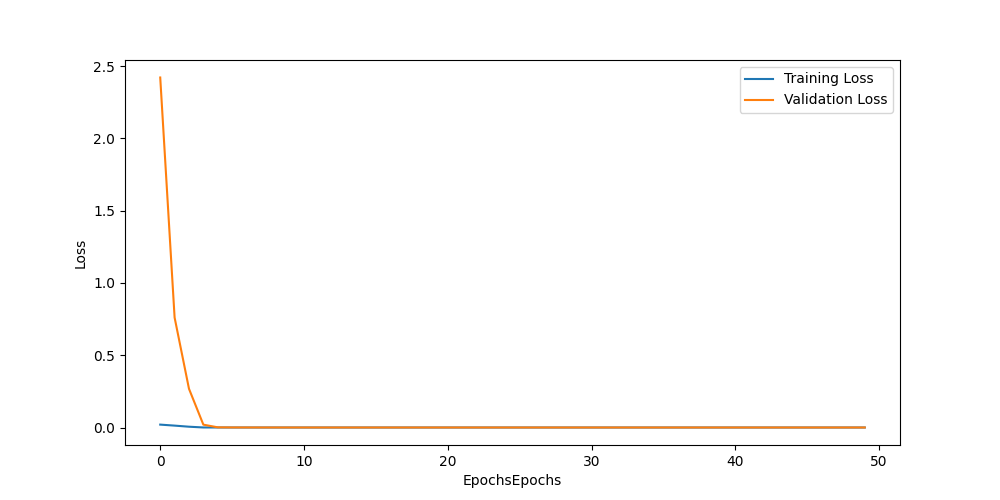

In [1]:
%matplotlib widget  
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the quadratic function
def f(x, a, b):
    f = a * x[:,0] + b * x[:,1]
    return f.unsqueeze(1)

# Define the constants a, b, and c
a, b = 2, 1

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3)  # 2 input , 3 nodes in hidden layer
        self.fc2 = nn.Linear(3, 1)   # 3 nodes in hidden layer, 1 output node

    def forward(self, x):
        x1 = self.fc1(x)
        x2 = torch.relu(x1)
        y = self.fc2(x2)
        return y

# Create the model
model = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Create a synthetic dataset
x_train = torch.randn(10000, 2)
# y_train = (2*x_train[:,0] + x_train[:,1]).unsqueeze(1) #torch.sum(x_train, axis=1).view(-1, 1)
y_train = f(x_train, a, b)

x_val = torch.randn(200, 2)
# y_val = (2*x_val[:,0]+x_val[:,1]).unsqueeze(1)
y_val = f(x_val, a, b)

# Create data loaders
train_loader = DataLoader(TensorDataset(x_train, y_train), batch_size=10)
val_loader = DataLoader(TensorDataset(x_val, y_val), batch_size=10)

# Prepare lists to save the losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(50):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    with torch.no_grad():
        val_loss = sum(criterion(model(inputs), targets) for inputs, targets in val_loader)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    print(f"Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

    # Save the model
    torch.save(model.state_dict(), 'minibatch_model.pth')

# Plot the training and validation losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('EpochsEpochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("minibatch_loss.png")
plt.show()


In [2]:
# Load the model
model = Net()
model.load_state_dict(torch.load('minibatch_model.pth'))

x_test = torch.randn(1,2)
y_expected = f(x_test, a, b)
print("x_test : ",x_test)
print("y_expected : ",y_expected)

y_predicted = model(x_test)
print("y_predicted : ",y_predicted.detach())

x_test :  tensor([[-1.6891, -1.9628]])
y_expected :  tensor([[-5.3411]])
y_predicted :  tensor([[-5.3410]])


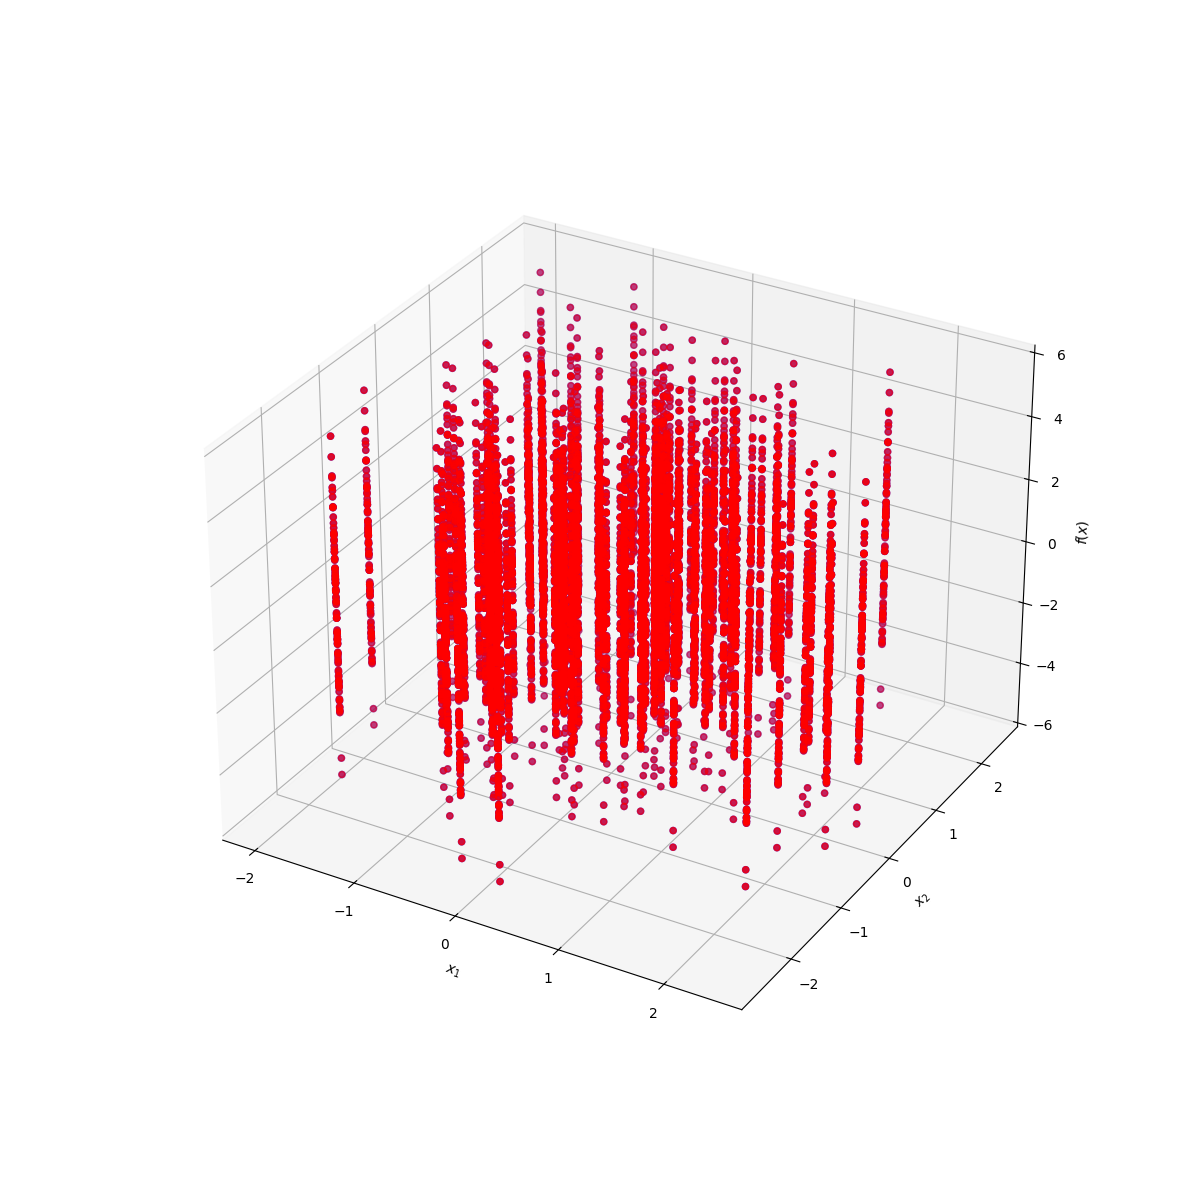

In [3]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
x_test = torch.randn(100,2)
y_predicted = model(x_test)

ax.scatter(x_test[:,0], x_test[:,1], f(x_test, a, b), c='b', marker='o')
ax.scatter(x_test[:,0], x_test[:,1], y_predicted.detach(), c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')

plt.show()
plt.savefig("minibatch inference results.png")